# 1. 파이썬

1. 파이썬에서는 tab보다 공백 문자 4개를 권장한다. (검색해보니 "파이썬 코딩 스타일 가이드(PEP 8)에서는 공백 4칸으로 규정하고 있습니다" 라고 한다)
2. class의 메소드들은 첫 번째 인수로 자신(self)를 사용한다.
3. 브로드 캐스트 : 형상이 다른 배열끼리 연산
4. 파이썬(동적 언어)는 C,C++(정적 언어)보다 처리속도가 느리다. -> 빠른 성능이 요구되는 부분은 C,C++로 해결 (Numpy도 주된 처리는 C,  C++로 구현)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 6, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, label ="sin")
plt.plot(x, y2, linestyle ="--", label ="cos")
plt.xlabel("x")
plt.ylabel("y")
plt.title("sin&cos")
plt.legend() # 8, 9번 줄의 label을 자동으로 가져온다.
plt.show()

<Figure size 640x480 with 1 Axes>

# 2. 퍼셉트론

In [2]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7 # AND 진리표를 만족하는 임의의 값을 넣어줌
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))


0
0
0
1


편향을 도입
b = -theta 로 해서
b + w1x1 + w2x2 가 0보다 작으면 0, 크면 1

In [4]:
import numpy as np
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7
print(w*x)
print(np.sum(w*x))
print(np.sum(w*x) + b)

[0.  0.5]
0.5
-0.19999999999999996


In [5]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))


0
0
0
1


가중치와 편향은 기능이 다르다.

가중치는 입력신호가 결과에 주는 영향력(중요도) 조절하는 매개변수
편향은 뉴런이 얼마나 쉽게 활성화하느냐를 조정하는 매개변수

In [6]:
# NAND 게이트

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print(NAND(0, 0))
print(NAND(0, 1))
print(NAND(1, 0))
print(NAND(1, 1))

1
1
1
0


In [7]:
# OR 게이트 (AND게이트와 가중치 w, b만 다르다)
# b가 두 개의 w보다 작아야한다? - 내 생각

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print(OR(0, 0))
print(OR(0, 1))
print(OR(1, 0))
print(OR(1, 1))

0
1
1
1


XOR게이트는 배타적 논리합이라는 논리 회로.
둘 중 하나만 1일때 1을 출력

퍼셉트론으로는 비선형 영역을 나타낼 수 없어서 XOR 게이트를 표현 불가
-> "다층 퍼셉트론을 만들 수 있다"는 점에서 장점이 있다.

조합을 통해서 XOR게이트를 만든다.

In [8]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0


XOR게이트는 다층 퍼셉트론이다

퍼셉트론은 층을 거듭 쌓으면 비선형적인 표현도 가능하고 컴퓨터가 수행하는 처리 모두 표현할 수 있다.

# 2. 신경망

퍼셉트론의 가중치들을 사람이 수동적으로 해야한다 -> 신경망이 이것을 해결.

가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 신경망의 중요한 성질이다.

신경먕은 입력층 -> 은닉층 -> 출력층 으로 구성

활성화 함수 : 활성화하는 역할 ( 0보다 크면 1 아니면 0 출력 - 계단 함수 )
ex) y = h(b + w1x1 + w2x2)

활성화 함수는 퍼셉트론에서 신경망으로 가기 위한 길잡이

*일반적으로 
(단순) 퍼셉트론 : 단층 네트워크에서 계단 함수를 활성화 함수로 사용한 모델
다층 퍼셉트론 : 신경망 (시그모이드 함수 등의 매끈한 활성화 함수를 사용하는 네트워크)



활성화 함수 (계단 함수를 다른 함수로 변경하는 것이 신경망으로 나아가는 열쇠)

(0). 계단 함수
h(x) = 1 if x>0 / 0 else

1. 시그모이드 함수
h(x) = 1 / 1 + e^-x

In [3]:
# 계단 함수 구현

def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

def step_function(x): # 넘파이 배열까지 지원하는 계단 함수
    y = x > 0
    return y.astype(np.int)

In [5]:
# 계단 함수 그래프

import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1) # x 값 설정
y = step_function(x) # y값 설정
plt.plot(x, y) # 그리기
plt.ylim(-0.1, 1.1) # y값 그래프 범위 설정
plt.show()


<Figure size 640x480 with 1 Axes>

In [8]:
# 시그모이드 함수 구현

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [7]:
# 시그모이드 함수 그래프

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

NameError: name 'plt' is not defined

계단 함수와 비교했을때 시그모이드 함수는 곡선을 나타낸다.
-> 이 점이 신경망 학습에서 아주 중요한 역할을 한다.

공통점 : 비선형 함수이다. (하나의 직선으로 그릴 수 없다)
-> 신경망에서는 활성화 함수로 비선형 함수를 사용해야함.


ReLU 함수
h(x) = x if x>0 / 0 else

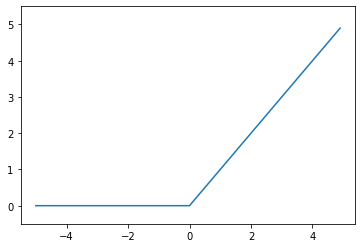

In [8]:
#ReLU 함수 그래프

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.5, 5.5)
plt.show()

행렬의 곱 - 1차원:벡터, 2차원:행렬 곱
np.dot(A, B) != np.dot(B, A)

2x3행렬, 2x2 행렬 곱 연산시 오류 출력 A의 열 수와 B의 행 수를 맞추어야함




In [9]:
# 입력층에서 1층으로 신호 전달
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

# 전달된 신호
A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [10]:
# 1층에서 활성화 함수 사용 후 Z1에 저장
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [13]:
# 1층에서 2층으로 신호 전달

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

# 전달된 신호
A2 = np.dot(Z1, W2) + B2

# 2층에서 활성화 함수 사용
Z2 = sigmoid(A2)

print(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [14]:
# 2층에서 출력층으로 신호 전달

def identity_function(x): # 항등 함수 (흐름을 통일하기 위해 그냥 구현)
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


In [16]:
# 구현 정리

def init_network(): # 가중치와 편향 초기화
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['B1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['B2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['B3'] = np.array([0.1, 0.2])

    return network

def forward(network, x): # 신호가 순방향으로 전달
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['B1'], network['B2'], network['B3']

    a1 = np.dot(x, W1) + B1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + B2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + B3
    y = identity_function(a3)

    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [17]:
## 소프트맥스 함수

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

## 출력층의 뉴런 수 정하기

분류에서 분류하고 싶은 클래스 수로 설정하는 것이 일반적임
ex) 숫자 0~9 분류 -> 출력층 뉴런은 10개

## 손글씨 숫자 인식

학습된 매개변수 사용, 학습 과정 생략, 추론 과정(순전파)만 구현

### MNIST 데이터셋



In [18]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

print(x_train.shape)

(60000, 784)


MNIST의 인수 3 가지 (bool 값)
1. normalize : True 픽셀 값을 0~1.0, False 픽셀 값을 0부터 255 사용
2. flatten : True 이미지를 1차원 배열로, False 3차원 배열로
3. one-hot-encoding : True 0, 1의 배열로 나타냄, False 숫자 형태의 레이블 저장 

## 신경망의 추론 처리

입력층 뉴런 : 784개 (28*28, 아마 픽셀의 개수?)
출력층 뉴런 : 10개 (0~9 숫자 분류)
은닉층 뉴런 : 1번-50개 뉴런, 2번-100개 뉴런 (임의의 개수)


정규화(normalization) : 데이터를 특정 범위로 변환하는 처리 (전처리의 일종?)
전처리(pre-processing) : 신경망의 입력 데이터에 특정 변환을 가하는 것

데이터 백색화(whitening) : 데이터를 균일하게 분포시키는 정규화?

In [19]:
import pickle
import numpy as np

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=False, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("./ch03/sample_weight.pkl", 'rb') as f: # .이 현재 디렉토리를 뜻함
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [22]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
    
print("Accuray:" + str(float(accuracy_cnt) / len(x)))

/home/bmk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Accuray:0.9207


## 배치 처리

전체적으로 보면 28*28인 2차원 배열 -> 원소가 10개인 1차원 배열 출력

배치(batch) : 하나로 묶은 입력 데이터
(수치 계산 라이브러리는 대부분 큰 배열을 효율적으로 처리할 수 있도록 최적화되어 있음
버스에 부하를 줄인다 -> CPU, GPU의 순수 계산 수행 비율이 증가)

100개의 이미지 묶음을 한꺼번에 입력 -> 100*10의 2차원 배열 출력 (속도가 더 빠름)



In [23]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9207


/home/bmk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


# 3장 정리

신경망 - 활성화 함수로 시그모이드 함수 (매끄럽게 변화하는 함수)
퍼셉트론 - 활성화 함수로 계단 함수 사용

# 4장 신경망 학습

학습 : 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것

신경망이 학습할 수 있도록 해주는 지표인 손실 함수를 공부할 예쩡
(손실 함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 목표)
-> 함수의 기울기를 활용하는 경사법

## 데이터 주도 학습

기계학습의 중심에는 데이터가 존재 -> 주어진 데이터에서 특징을 추출해 그 특징의 패턴을 기계학습 기술로 학습하는 방법이 있다. (이미지의 특징은 보통 벡터로 기술)

신경망(딥러닝)은 데이터 그대로를 입력 데이터로 활용해 학습한다. 
(사람의 개입이 전혀 없이 기계가 스스로 학습)

## 훈련 데이터와 시험 데이터

훈련 데이터만 사용해 최적의 매개변수를 찾는다.
시험 데이터를 사용해 훈련한 모델의 실력을 평가

나누는 이유? - 범용 능력을 제대로 평가하기 위해서 (아직 보지 못한 데이터를 풀어내는 능력)

오버피팅 : 한 데이터셋에만 지나치게 최적화된 상태

## 손실 함수

신경망 학습에서는 손실 함수를 기준으로 최적의 매개변수 값을 찾는다.
(훈련 데이터를 얼마나 잘 처리하지 못하느냐를 나타냄)

일반적으로 오차제곱합과 교차 엔트로피 오차를 사용



In [24]:
# 오차제곱합

def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# 교차 엔트로피 오차

def cross_entropy_error(y, t):
    delta = 1e-7 # 델타값들 더하는 이유는 0일 경우 -inf가 되는 것을 방지
    return -np.num(t * np.log(y +delta))
    

## 미니배치 학습

기계학습에서 손실 함수 값을 최대한 줄여주는 매개변수(가중치, 편향)를 찾아야함.
따라서 모든 훈련 데이터에 대한 손실 함수 값 구해야함.

하지만 모든 데이터에 대한 손실 함수 값을 구해 평균 내는 것은 힘들다.
-> 미니배치를 통해 많은 데이터 중 일부만 무작위로 뽑아 학습을 한다.

In [51]:
# 10개만 무작위로 뽑음

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # 뽑아내기
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print("x_batch:", x_batch)
print("t_batch:", t_batch)

x_batch: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
t_batch: [9 9 4 8 2 0 7 8 9 7]


In [20]:
np.random.choice(60000, 10)

array([57412, 40037, 41138, 17298, 35274,  5753, 50284, 53865, 54471,
       51284])

## (배치용) 교차 엔트로피 오차 구현하기

In [21]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [22]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

왜 손실 함수를 설정하는가?
-> 높은 정확돌르 끌어내는 매개변수를 찾는 것이 궁극적인 목적
이때 매개변수릐 미분을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복

미분값이 음수면 가중치를 양의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있음
미분값이 양수면 가중치를 음의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있음
미분값이 0이면 변화시켜도 손실 함수의 값이 줄어들지 않는다. -> 갱신 멈춤


*신경망을 학습할 때 정확도를 지표로 삼아서는 안 된다. 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다.
why? 정확도는 33% -> 34% 로 불연속적인 값으로 변화하기 때문에 미소한 변화에는 거의 반응을 보이지 않기 때문이다.
이것은 또한 활성화 함수로 계단 함수를 사용하지 않는 이유가 될 수 있음.

시그모이드 함수는 미분이 0이 되지 않음

## 4.3 수치미분

경사법에서는 기울기 값을 기준으로 나아갈 방향을 정합니다.

미분시 주의사항
1. 극한 h->0에서 h로 0에 가까운 값을 넣기 위해 너무 작은 값을 넣으면 반올림 오차로 인해 0이 되어버린다. -> h로 10^-4 정도의 값 사용
2. 함수의 차분 -> 중앙 차분 이용하기

적용한 수치 미분 구현(아래)

In [12]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

## 4.3.2 수치 미분의 예
y = 0.01x^2 + 0.1x

In [13]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

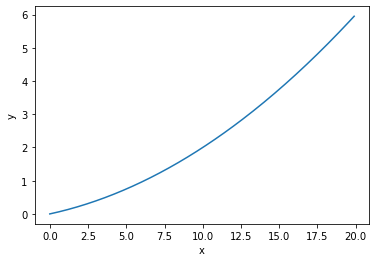

In [14]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show()

In [15]:
numerical_diff(function_1, 5)

0.1999999999990898

In [16]:
numerical_diff(function_1, 10)

0.2999999999986347

## 4.3.3 편미분

In [42]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [43]:
# x0 = 3, x1 = 4 편미분 x0

def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [44]:
# x0 = 3, x1 = 4 편미분 x1

def function_tmp2(x1):
    return 3.0**2 + x1**2.0

numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [48]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h 
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

** 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄인느 방향 **

## 4.4.1 경사법 (경사 하강법) - 기계학습을 최적화하는데 흔히 쓰는 방법

기울기를 잘 이용해 함수의 최솟값을 찾으려는 것이 경사 하강법임

기울기가 가리키는 곳에 최솟값이 있는지는 보장할 수 없음.

기울기가 가리키는 방향으로 일정거리 이동 후 다시 기울기 측정 
-> 반복하여 함수의 값을 점차 줄이는 것이 경사법

경사법을 수식으로 나타낸 것에서 에타 기호는 갱신하는 양을 나타내고 신경망 학습에서는 이를 학습률이라고 부른다.

이 학습률 값은 미리 특정 값으로 정해두어야 하는데, 너무 크거나 작으면 좋은 장소를 찾아갈 수 없다. 신경망 학습에서는 학습률 값을 변경하면서 올바르게 학습하고 있는지를 확인하면서 진행한다.

In [49]:
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [50]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

**학습률이 너무 크거나 작으면 좋은 결과를 얻을 수 없음**

In [71]:
import sys, os
sys.path.append("/home/bmk/repos/DeepLearning/deep-learning-from-scratch-master")
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [75]:
net = simpleNet()
print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

np.argmax(p)

t = np.array([0, 0, 1])
net.loss(x, t)

[[-0.20602219  0.18468072 -0.35062362]
 [ 2.03030589 -0.05020363 -0.23828624]]
[ 1.70366199  0.06562516 -0.42483179]


2.401094858508889

In [76]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.45683687  0.08879138 -0.54562825]
 [ 0.68525531  0.13318707 -0.81844237]]


In [77]:
f = lambda w: net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.45683687  0.08879138 -0.54562825]
 [ 0.68525531  0.13318707 -0.81844237]]


## 4.5 학습 알고리즘 구현하기

신경망 학습의 순서

전제. 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다. 신경망 학습은 다음과 같이 4단계로 수행

1단계. 미니배치 - 훈련 데이터 중 일부를 무작위로 가져옴. 선별한 데이터를 미니배치라 부르고 미니배치의 손실 함수 값을 줄이는 것이 목표

2단계. 기울기 산출 - 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수 값을 가장 작게 하는 방향을 제시

3단계. 매개변수 갱신 - 매개변수를 기울기 방향으로 아주 조금 갱신(이동)

4단계. 반복 - 1~3 단계 반복



경사 하강법으로 매개변수를 갱신하는 방법이며, 미니배치로 무작위 선정하기 때문에 확률적 경사 하강법(SGD)이라 부름.

In [1]:
# 2층 신경망 클래스 구현하기

import sys, os
sys.path.append("/home/bmk/repos/DeepLearning/deep-learning-from-scratch-master")
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        # params : 신경망의 매개변수를 보관하는 딕셔너리 변수
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    # 예측(추론)
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x : 입력 데이터, t : 정답 레이블
    # 손실 함수의 값을 계산
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    # 정확도 구하기
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        # grads : 신경망 매개변수의 기울기를 보관하는 딕셔너리 변수
        # loss_W에는 추론을 하고 정답 레이블과 비교하여 교차 엔트로피 방식으로 구한 손실 함수의 크기를 저장하는 변수이고
        # grads 에는 신경망 매개변수를 조금 변화시켰을때 손실 함수가 얼마나 변하는지(기울기)를 저장
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [11]:
# 미니배치 학습 구현하기

import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계싼
    grad = network.numerical_gradient(x_batch, t_batch)
    #grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)


KeyboardInterrupt: 